In [1]:
## crawling(scrapying)
# web에서 데이터를 프로그램을 통해서 가져오는 작업

# web 구성하는 언어 - html, css, javascript
# html은 웹을 구성하는 스크립트 언어 
# css는 웹을 꾸며주는 언어 
# javascript 웹이 동적으로 작동하도록 만드는 언어

## html
# 기본 구조는 태그 - 여는 태그 '<'
#                    닫는 태그 '/>'
# 태그 계층 구조 - 부모 태그, 자식 태그
# <head> 정보... </head> : web의 정보를 담고 있는 태그 
# <body> 태그... </body> : web에서 눈으로 보는 내용이 들어있는 태그 


In [2]:
<html>
    <head>
        web page meta 정보
    
    </head>
    
    <body>
        웹페이지에서 보여지는 콘텐츠가 들어가는 부분
        <p>문단을 나타냅니다</p>
        <div><h3>제목을 나타냅니다</h3></div>
    
    </body>

</html>

SyntaxError: invalid syntax (Temp/ipykernel_9516/3395703636.py, line 1)

In [3]:
<html>
    <head>
       <style>
        p{color:blue;}
        div{color:red;}
        </style>
    
    </head>
    
    <body>
        <table border = 1>
        <tr>
            <td>항목</td>
            <td>20113</td>
            <td>2014</td>
        </tr>
        <tr>
            <td>항목</td>
            <td>20113</td>
            <td>2014</td>
        </tr>        
    </body>

</html>

SyntaxError: invalid syntax (Temp/ipykernel_9516/1693897580.py, line 1)

In [4]:
<html>
    <head>
       <style>
        p{color:blue;}
        div{color:red;}
        </style>
    
    </head>
    
    <body>
       <p> paragraph1</p>
        <p> paragrph</p>
        <div> div1 </div>
    </body>

</html>

SyntaxError: invalid syntax (Temp/ipykernel_9516/1906271762.py, line 1)

In [5]:
from bs4 import BeautifulSoup

In [6]:
html = """
<body>
<div>
    <div class = 'snack'>
        <p id = 'first'> 양파링 </p>
        <p id = 'second'> 새우깡 </p>
        <p> 초코파이</p>
        <p class='sweet'>맛동산 </p>
    
    <div class = 'ice cream'>
        <p> 빵빠레</p>
        <p id = 'third'> 죠스바 </p>
        <p> 꼬깔콘</p>
        <p class='sweet'>쭈쭈바 </p>
        </div>
    </div>
    </body>
    """

In [7]:
soup = BeautifulSoup(html, 'html.parser')

In [8]:
for t in soup.select('td'):
    print(t.text)

In [9]:
for t in soup.select('p'):
    print(t.text)

 양파링 
 새우깡 
 초코파이
맛동산 
 빵빠레
 죠스바 
 꼬깔콘
쭈쭈바 


In [10]:
soup.select('p#sweet')[1].text

IndexError: list index out of range

In [11]:
soup.select('p#first')[0].text

' 양파링 '

In [12]:
# 네이버 메뉴 크롤링

In [13]:
import requests

In [14]:
res = requests.get("https://www.naver.com/")

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
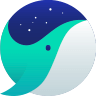
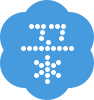

In [15]:
res.text

In [16]:
soup = BeautifulSoup(res.text, 'html.parser')

In [17]:
path = "#NM_FAVORITE > div.group_nav > ul.list_nav.NM_FAVORITE_LIST > li"

In [18]:
lis = soup.select(path)

In [19]:
# <li>.....<li>        목록을 만드는 태그 
# <a href = "https://www.daum.net"> 다음 </a>          # a 태그 = 하이퍼링크 태그 

In [20]:
for li in lis:
    print(li.text, li.select('a')[0]['href'])

사전 https://dict.naver.com/
뉴스 https://news.naver.com/
증권 https://finance.naver.com/
부동산 https://land.naver.com/
지도 https://map.naver.com/
VIBE https://vibe.naver.com/
책 https://book.naver.com/
웹툰 https://comic.naver.com/


In [21]:
import requests

In [22]:
url = "https://search.daum.net/search?w=news&nil_search=btn&DA=NTB&enc=utf8&cluster=y&cluster_page=1&q=%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0"

In [23]:
res = requests.get(url)
res.text

'<script type="text/javascript">\nlocation.replace( "http://ncaptcha.search.daum.net/captcha/show?redirect=http%3A%2F%2Fsearch.daum.net%2Fsearch%3Fw%3Dnews%26nil_search%3Dbtn%26DA%3DNTB%26enc%3Dutf8%26cluster%3Dy%26cluster_page%3D1%26q%3D%25EB%25B9%2585%25EB%258D%25B0%25EC%259D%25B4%25ED%2584%25B0" );\n</script>\n'

In [24]:
#newsColl > div.cont_divider > ul > li:nth-child(1) > div.wrap_cont > p

In [25]:
soup = BeautifulSoup(res.text, 'html.parser')

In [26]:
path = '#newsColl > div.cont_divider > ul > li'

In [27]:
tags = soup.select(path)
tags

[]

In [28]:
# 제목 : [투데이 窓]빅데이터에서 미래를 읽는 통찰력
# URL : http://v.media.daum.net/v/20220119020501044?f=o
# =================================================


In [29]:
tags[0]

IndexError: list index out of range

In [30]:
for t in tags:
    print("제목 :",t.select('a')[1].text)
    print(" URL : ",t.select('a')[0]['href'])
    print("요약 :",t.select('p')[0].text)
    print("----------")
    

In [31]:
from bs4 import BeautifulSoup
import requests

In [32]:
url = 'https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=아이유'
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')
path = "#newsColl > div.cont_divider > ul > li"

In [33]:
summary = soup.select(path)
summary

[<li> <div class="wrap_thumb" id="news_img_0"> <a class="thumb" href="http://v.media.daum.net/v/20220120101749219?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26q7DHQq-Ng_XdP_8z&amp;pg=1&amp;r=1&amp;p=1&amp;rc=10&amp;e1=16JQzgnVEpdmOW7h61&amp;e3=0&amp;ext=dsid=26q7DHQq-Ng_XdP_8z", event, {"cpid": {"value": "16JQzgnVEpdmOW7h61"}});' target="_blank"> <img alt="" class="thumb_img" data-size="80x80" height="80" onerror="SF.errorImage(this)" src="https://search1.daumcdn.net/thumb/P200x200/?fname=https%3A%2F%2Fsearch3.kakaocdn.net%2Fargon%2F200x200_85_c%2FGkUlpv6yjTz0" width="80"/> </a> </div> <div class="wrap_cont"> <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20220120101749219?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26q7DHQq-Ng_XdP_8z&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16JQzgnVEpdmOW7h61&amp;e3=0&amp;ext=dsid=26q7DHQq-Ng_XdP_8z", event, {"cpid": {"value": "16JQzgnVEpdmOW7h61"}});' target="_blank">BTS-세븐틴-<b>아이유</b>-임영웅, 뮤빗 선정 '2021년 최고의 아티스트' 각 부문 1위</a> <p class="d

In [34]:
for li in summary :
#     print(li.select('a')[1].text)
    
    print(li.select('p')[0].text)

2021 케이팝 연말결산’ 최고의 아티스트 종합 1위로 방탄소년단(BTS)이 선정됐다. NCT DREAM, NCT 127, 세븐틴, 임영웅, 에스파, 아이유, 트와이스, 있지, 스트레이 키즈가 뒤를 이었다”고 밝혔다. 음원 1위를 기록한 아이유와 음반 1위의 세븐틴, 동영상 조회 수...
[일간스포츠 이지수] 가수 아이유가 파격적인 드레스 자태를 공개했다. 아이유는 19일 자신의 인스타그램에 "아이보리가 잘 받는 나"라는 글과 함께 사진 한 장을 올려놨다. 해당 사진에서 그는 화사한 꽃들이 가득한 곳을 배경으로, 아이보리 시스루 드레스를 입고...
[동아닷컴] 아이유, 사랑스러운 삐약이 [화보] 가수 아이유가 앰배서더로 활동 중인 스포츠 브랜드와의 2022년 새 일상 캠페인을 공개했다. 앞서 첫 번째 캠페인 ‘We Got Now’와 ‘기다리지 않는 것이 미덕’, 두 번째 캠페인 ‘나 자신, 나만의 빛을 찾아 떠나는...
가수 겸 배우 아이유가 청순한 매력을 뽐냈다. 아이유는 자신의 인스타그램에 "아이보리가 잘 받는 나"라는 글과 함께 사진을 올렸다. 공개된 사진에서 아이유는 꽃을 배경으로 아이보리 컬러의 시스루 원피스를 입고 있고 포즈를 취하고 있다. 화사한 꽃과 달리 톤...
아이유 꽃 사진=아이유 인스타그램 가수 아이유가 꽃보다 아름다운 비주얼을 자랑했다. 아이유는 지난 19일 오후 자신의 인스타그램에 “아이보리가 잘 받는 나”라는 글과 사진을 게재했다. 사진 속에는 꽃밭에 앉아 있는 그의 모습이 담겨 있다. 하늘하늘한 원피스...
뉴발란스(NEW BALANCE)가 브랜드 엠베서더 아이유와 함께한 2022년 새로운 일상 캠페인을 공개했다.최근 2022년 첫 캠페인으로 ‘자신만의 삶을 나만의 방식으로, 나만의 공간에서 찾아가는’ 아이유의 모습을 담아 공개한 바 있다.이번 캠페인은 아이유가 집안...
가수 겸 배우 아이유 /사진제공=뉴발란스 가수 겸 배우 아이유의 2022년 새 화보가 공개됐다. 19일 스포츠 브랜드 뉴발란스(NEW BALANCE)는 브랜드 앰

In [35]:
a = 1

In [36]:
# 검색어를 입력 받은 후 해당 검색어로 검색한 다음 뉴스 페이지에서 검색한 결과의 제목, url, summary를 크롤링하시오 

In [43]:
url = 'https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=아이유'
search_kw = input("검색할 단어를 입력하세요 ")
url.format(search_kw)

검색할 단어를 입력하세요 아이유


'https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=아이유'

In [44]:
html = requests.get(url)
html

<Response [200]>

In [45]:
path = '#newsColl > div.cont_divider > ul > li'

In [46]:
soup = BeautifulSoup(html.text, 'html.parser')

In [47]:
soup.select(path)

[<li> <div class="wrap_thumb" id="news_img_0"> <a class="thumb" href="http://v.media.daum.net/v/20220120101749219?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26q7DHQq-Ng_XdP_8z&amp;pg=1&amp;r=1&amp;p=1&amp;rc=10&amp;e1=16JQzgnVEpdmOW7h61&amp;e3=0&amp;ext=dsid=26q7DHQq-Ng_XdP_8z", event, {"cpid": {"value": "16JQzgnVEpdmOW7h61"}});' target="_blank"> <img alt="" class="thumb_img" data-size="80x80" height="80" onerror="SF.errorImage(this)" src="https://search1.daumcdn.net/thumb/P200x200/?fname=https%3A%2F%2Fsearch3.kakaocdn.net%2Fargon%2F200x200_85_c%2FGkUlpv6yjTz0" width="80"/> </a> </div> <div class="wrap_cont"> <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20220120101749219?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26q7DHQq-Ng_XdP_8z&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16JQzgnVEpdmOW7h61&amp;e3=0&amp;ext=dsid=26q7DHQq-Ng_XdP_8z", event, {"cpid": {"value": "16JQzgnVEpdmOW7h61"}});' target="_blank">BTS-세븐틴-<b>아이유</b>-임영웅, 뮤빗 선정 '2021년 최고의 아티스트' 각 부문 1위</a> <p class="d

In [48]:
soup.select(path)[0].select("a.tit_main")[0].text

"BTS-세븐틴-아이유-임영웅, 뮤빗 선정 '2021년 최고의 아티스트' 각 부문 1위"

In [49]:
soup.select(path)[0].select("a.tit_main")[0]['href']

'http://v.media.daum.net/v/20220120101749219?f=o'

In [50]:
soup.select(path)[0].select('p.desc')[0].text

'2021 케이팝 연말결산’ 최고의 아티스트 종합 1위로 방탄소년단(BTS)이 선정됐다. NCT DREAM, NCT 127, 세븐틴, 임영웅, 에스파, 아이유, 트와이스, 있지, 스트레이 키즈가 뒤를 이었다”고 밝혔다. 음원 1위를 기록한 아이유와 음반 1위의 세븐틴, 동영상 조회 수...'

In [86]:
url = 'https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=아이유'
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')
path = "#newsColl > div.cont_divider > ul > li"

In [87]:
soup.select(path)[0].select('a')[1]

<a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20220120101749219?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26q7DHQq-Ng_XdP_8z&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16JQzgnVEpdmOW7h61&amp;e3=0&amp;ext=dsid=26q7DHQq-Ng_XdP_8z", event, {"cpid": {"value": "16JQzgnVEpdmOW7h61"}});' target="_blank">BTS-세븐틴-<b>아이유</b>-임영웅, 뮤빗 선정 '2021년 최고의 아티스트' 각 부문 1위</a>

In [88]:
# 검색 키워드를 입력받은 후 제목과 url, 본문을 크롤링하는 함수를 만드시오 

def crawling_daum_news():
    url = 'https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q={}&p={}'
    search_kw = input("검색할 단어를 입력하세요 ")
    page_num = int(input("검색할 페이지를 입력하세요 "))
    url = url.format(search_kw,page_num)
    
    html = requests.get(url)
    
    soup = BeautifulSoup(html.text, 'html.parser')
    path = '#newsColl > div.cont_divider > ul > li'
    tags = soup.select(path)

    for t in tags:
        print("제목 :",t.select('a')[1].text)
        print(" URL : ",t.select('a')[0]['href'])
        print("요약 :",t.select('p')[0].text)
        print("언론사 : ",t.select('span.f_nb')[0].text)
        print("작성 시간 : ",t.select('span.f_nb')[1].text)
        print("-" * 100)
        print()
#     <span class="cont_info"> <span class="f_nb">스타투데이</span>

In [89]:
crawling_daum_news()

검색할 단어를 입력하세요 BTS
검색할 페이지를 입력하세요 2
제목 : '주접이 풍년' 박미선 "BTS, 나왔으면..아미를 기다리고 있습니다"
 URL :  http://v.media.daum.net/v/20220119144955582?f=o
요약 : 예능프로그램 '팬심자랑대회 주접이 풍년'(이하 '주접이 풍년') 제작발표회에 참석해 모시고 싶은 스타에 대해 "BTS. 당연히 나와야죠"라고 말했다. 박미선은 BTS를 향해 러브콜을 한 후, "아미 여러분 기다리고 있습니다"고 말해 시선을 끌었다. 또한 그는NCT, 고수...
언론사 :  스타뉴스
작성 시간 :  19시간전
----------------------------------------------------------------------------------------------------

제목 : BTS 지민 찾은 제주, 관광도 '웃고' 팬들도 '뿌듯'
 URL :  http://v.media.daum.net/v/20220113103043095?f=o
요약 : 상인회 "죽었던 거리에 활기가..감사하고 또 찾아달라"아미들 "제주 관심 많아졌다. 오빠 따라 여행하고 싶어"
언론사 :  연합뉴스
작성 시간 :  2022.01.13
----------------------------------------------------------------------------------------------------

제목 : BTS-inspired web novel, webtoon surpass 15 million views
 URL :  http://v.media.daum.net/v/20220118163256983?f=o
요약 : A BTS-inspired web novel and webtoon surpassed 15 million views within two days of their release, according to the boy band's agency HYBE on Tuesday. "'7Fates

In [ ]:
'a' +'b'

In [58]:
url + ' 아이유'

'https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q=아이유 아이유'

In [ ]:
# 키워드와 크롤링할 페이지 수 를 매개변수로 입력받은 후 
#다음 뉴스페이지에서 제목, url, summary,언론사, 시간을 10페이지를 크롤링해서 출력하는 함수를 만드시오 

In [59]:
url = 'https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q={}&p={}'
search_kw = input("검색할 단어를 입력하세요 ")
page_num = int(input())
url = url.format(search_kw,page_num)
print(url)

KeyboardInterrupt: Interrupted by user

In [84]:

def crawling_daum_news(kw):
    url = 'https://search.daum.net/search?nil_suggest=btn&w=news&DA=SBC&q={}&p={}'
    search_kw = input("검색할 단어를 입력하세요 ")
    page_num = int(input())
    url = url.format(search_kw,page_num)

    html = requests.get(url)
    
    soup = BeautifulSoup(html.text, 'html.parser')
    path = '#newsColl > div.cont_divider > ul > li'
    tags = soup.select(path)

    for t in tags:
        print("제목 :",t.select('a')[1].text)
        print(" URL : ",t.select('a')[0]['href'])
        print("요약 :",t.select('p')[0].text)
        print("----------")
        print()
    

In [85]:
crawling_daum.news("아이유")

NameError: name 'crawling_daum' is not defined

In [72]:
html = """
<html>
<head>
    <title>The Dormouse's story</title>
</head>
<body>
    <h1>this is h1 area</h1>
    <h2>this is h2 area</h2>
    <p class="title">
        <b>The Dormouse's story</b>
    </p>
    <p class="story">
        Once upon a time there were three little sisters
        <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>
        <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a>
        <a data-io="link3" href="http://example.com/tillie" class="brother" id="link3">Tillie</a>
        <b> 
            test
            <a href="http://example.com/test" class="brother" id="link4">TEST</a>
        </b>

    </p>
    <p class="story">story...</p>
</body>
</html>
"""

In [73]:
# 'The Dormouse's story'를 출력하시오..
# 'Elsie'를 출력하시오.
# "http://example.com/lacie"를 출력하시오
# 'test'를 출력하시오
# 'story...'를 출력하시오

In [74]:
soup = BeautifulSoup(html, 'html.parser')

In [83]:
print(soup.select("p > b")[0].text)
print(soup.select("a")[0].text)
print(soup.select("a")[1]["href"])
print(soup.select("b")[1].text.strip().split()[0])
print(soup.select("p.story")[1].text)

The Dormouse's story
Elsie
http://example.com/lacie
test
story...


In [76]:
print(soup.select("b")[1].text)

 
            test
            TEST



In [77]:
a = soup.select("b")[1].text

In [78]:
print(soup.select("b")[1].text.strip().split()[0])

test


In [79]:
print('{} {} {}'.format(1,2,3).split())

['1', '2', '3']


In [11]:
class User:
    # 인스턴스 변수 설정
    def __init__(self, name, email, password):
        self.name = name
        self.email = email
        self.password = password

        self.following_list = []    # 이 유저가 팔로우하는 유저 리스트
        self.followers_list = []    # 이 유저를 팔로우하는 유저 리스트

    # 팔로우
    def follow(self, another_user):
        self.followers_list.append(another_user)
        another_user.followers_list.append(self.name)

    # 내가 몇 명을 팔로우하는지 리턴
    def num_following(self):
        return len(self.following_list)

    # 나를 몇 명이 팔로우하는지 리턴
    def num_followers(self):
        return len(self.followers_list)

# 유저들 생성
        user1 = User("Young", "young@codeit.kr", "123456")
        user2 = User("Yoonsoo", "yoonsoo@codeit.kr", "abcdef")
        user3 = User("Taeho", "taeho@codeit.kr", "123abc")
        user4 = User("Lisa", "lisa@codeit.kr", "abc123")

        # 유저마다 서로 관심 있는 유저를 팔로우
        user1.follow(user2)
        user1.follow(user3)
        user2.follow(user1)
        user2.follow(user3)
        user2.follow(user4)
        user4.follow(user1)

        # 유저 이름, 자신의 팔로워 수, 자신이 팔로우하는 사람 수를 출력합니다
        print(user1.name, user1.num_followers(), user1.num_following())
        print(user2.name, user2.num_followers(), user2.num_following())
        print(user3.name, user3.num_followers(), user3.num_following())
        print(user4.name, user4.num_followers(), user4.num_following())